<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

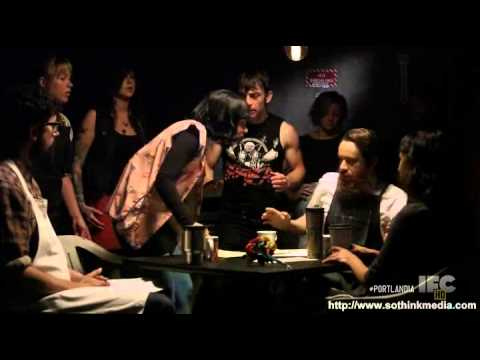

In [18]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [19]:
%pwd

'/Users/griffinwilson/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [41]:
shops['review_text'] = shops['full_review_text'].str.replace('\d+', '')

In [42]:
shops.drop(['full_review_text'], axis=1, inplace=True)

In [44]:
shops['rating'] = shops['star_rating'].str.replace(r'\D', '')

In [45]:
shops.drop(['star_rating'], axis=1, inplace=True)

In [46]:
shops.tail()

,coffee_shop_name,review_text,rating
7611,The Steeping Room,// I actually step into this restaurant by ch...,40
7612,The Steeping Room,"// Ok, The Steeping Room IS awesome. How do t...",50
7613,The Steeping Room,"// Loved coming here for tea, and the atmosph...",40
7614,The Steeping Room,// The food is just average. The booths didn'...,30
7615,The Steeping Room,// I finally stopped in for lunch with my col...,40


In [57]:
#doesn't seem to be working
shops['coffee_shop_name'] = shops['coffee_shop_name'].astype(str)

In [58]:
shops['rating'] = shops['rating'].astype(int)

In [59]:
shops.dtypes

coffee_shop_name    object
review_text         object
rating               int64
dtype: object

In [60]:
shops['rating'] = shops['rating'] / 10

In [62]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [63]:
shops['review_text'] = shops['review_text'].str.replace('check-in', '')

In [73]:
shops['review_text'] = shops['review_text'].str.replace('//', '')

In [74]:
shops.head()

,coffee_shop_name,review_text,rating,tokens,good_rating
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corn...,5.0,"[ , //, , Love, love, loved, the, atmosphere...",True
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,"[ , //, Listed, in, Date, Night:, Austin,, Amb...",True
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,"[ , //, , Listed, in, Brunch, Spots, I, love...",True
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,"[ , //, Very, cool, decor!, Good, drinks, Nice...",False
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,"[ , //, , They, are, located, within, the, N...",True


In [65]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [86]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    
    doc_tokens = [token.text.strip() for token in doc]
    
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [94]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [95]:
shops['good_rating'] = shops['rating'] >= 4

In [96]:
shops.head()

,coffee_shop_name,review_text,rating,tokens,good_rating
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corn...,5.0,"[ , love, love, loved, atmosphere!, corner,...",True
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,"[ , listed, date, night:, austin,, ambiance, ...",True
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,"[ , listed, brunch, spots, loved, eclectic,...",True
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,"[ , cool, decor!, good, drinks, nice, seating...",False
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,"[ , located, northcross, mall, shopping, ce...",True


In [97]:
shops['good_rating'].value_counts()
#most ratings appear good, perhaps reviewing was incentivized via a free appetizer
#maybe we downsample/upsample to balance classes and make inferences after

True     6140
False    1476
Name: good_rating, dtype: int64

In [79]:
#boilerplate count func. to help w text
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [98]:
# Use the Function
text_data = count(shops['tokens'])

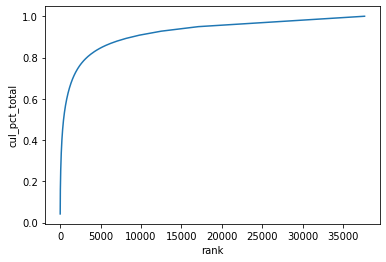

In [99]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=text_data);

In [100]:
text_data[text_data['rank'] <= 100]['cul_pct_total'].max()
#this infers nearly half of the total % is explained by the top 100 words

0.3017186645846254

In [101]:
text_data.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,,4758,17213,1.0,0.042196,0.042196,0.624737
19,coffee,4210,8058,2.0,0.019753,0.061949,0.552784
66,,4824,5066,3.0,0.012419,0.074368,0.633403
123,place,3029,4264,4.0,0.010453,0.084820,0.397715
75,great,2438,3250,5.0,0.007967,0.092787,0.320116


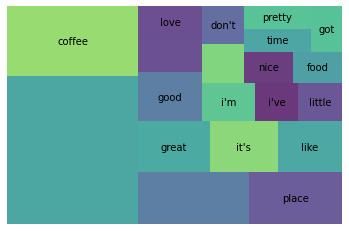

In [102]:
import squarify
import matplotlib.pyplot as plt

text_data_top20 = text_data[text_data['rank'] <= 20]

squarify.plot(sizes=text_data_top20['pct_total'], label=text_data_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [157]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee","it's", "i'm", "i've", "got", "it", " ", "it.", "place", "this", "  ", "", "   ", "    ", " -", "-", "  -", "s", " s", "s ", " s ", "coffee.", "shop", "come", "don't", "time", "austin", "people", "coffee,", "work", "tea", "iced", "definitely", "drink", "try", "ordered", "you're", "didn't", "&", "know", "want", "came"])

In [158]:
tokens = []

for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [159]:
text_data = count(shops['tokens'])
text_data.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,great,2438,3250,1.0,0.009487,0.009487,0.320116
149,like,2034,2902,2.0,0.008471,0.017958,0.267069
176,good,2084,2779,3.0,0.008112,0.026070,0.273634
19,love,1434,1806,4.0,0.005272,0.031342,0.188288
751,little,1230,1479,5.0,0.004317,0.035660,0.161502


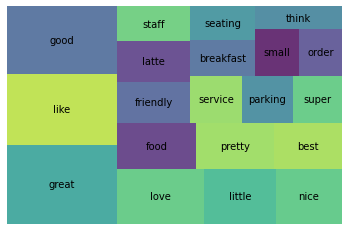

In [160]:
text_data_top20 = text_data[text_data['rank'] <= 20]

squarify.plot(sizes=text_data_top20['pct_total'], label=text_data_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [121]:
shops['rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: rating, dtype: int64

In [130]:
len(shops['review_text'][0])

542

In [173]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [174]:
shops['lemmas'] = shops['review_text'].apply(get_lemmas)

In [175]:
text_data = count(shops['lemmas'])
text_data.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,be,7081,42768,1.0,0.057237,0.057237,0.929753
18,the,6854,34880,2.0,0.046681,0.103918,0.899947
12,and,6867,26746,3.0,0.035795,0.139713,0.901654
53,a,6246,22775,4.0,0.030480,0.170193,0.820116
16,to,5692,17442,5.0,0.023343,0.193536,0.747374


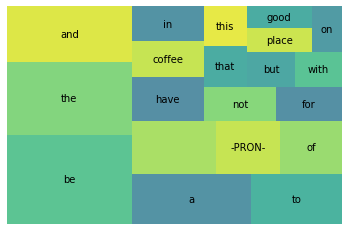

In [176]:
text_data = count(shops['lemmas'])
text_data_top20 = text_data[text_data['rank'] <= 20]

squarify.plot(sizes=text_data_top20['pct_total'], label=text_data_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

